In [1]:
import tensorflow as tf
import os

C:\Users\ASUS\.conda\envs\myenv\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
gpus = tf.config.experimental.list_physical_devices('CPU')

In [3]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
import cv2
import imghdr

In [6]:
data_dir = 'data'

In [7]:
image_extension = ['jpg']

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
    'D:/WebDjango/data/train/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    'D:/WebDjango/data/test/',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 2609 images belonging to 19 classes.
Found 897 images belonging to 20 classes.


In [10]:
path = 'D:/WebDjango/data/train/' 

In [11]:
class_names = sorted(os.listdir(path))
num_classes = len(class_names)

img_size = (192, 192, 3)

print('classes: ', class_names)

classes:  ['Acne and Rosacea Photos', 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', 'Atopic Dermatitis Photos', 'Cellulitis Impetigo and other Bacterial Infections', 'Eczema Photos', 'Exanthems and Drug Eruptions', 'Herpes HPV and other STDs Photos', 'Light Diseases and Disorders of Pigmentation', 'Lupus and other Connective Tissue diseases', 'Melanoma Skin Cancer Nevi and Moles', 'Poison Ivy Photos and other Contact Dermatitis', 'Psoriasis pictures Lichen Planus and related diseases', 'Seborrheic Keratoses and other Benign Tumors', 'Systemic Disease', 'Tinea Ringworm Candidiasis and other Fungal Infections', 'Urticaria Hives', 'Vascular Tumors', 'Vasculitis Photos', 'Warts Molluscum and other Viral Infections']


In [12]:
labels = []
images = []

print('images:\n')
for cl in class_names:
    print(cl, end=' -> ')
    for img in os.listdir(path + cl):
        label = np.zeros(num_classes)
        label[class_names.index(cl)] = 1
        labels.append(label)
        
        image = np.asarray(cv2.resize(cv2.imread(path + cl + '/' + img, cv2.IMREAD_COLOR), img_size[0:2])[:, :, ::-1])
        
        #image = np.asarray(cv2.resize(cv2.imread(data_path + cl + '/' + img, cv2.COLOR_BGR2RGB), img_size[0:2]))
        images.append(image)
    print('done')

    
labels = np.asarray(labels)
images = np.asarray(images)

print(f'\n\nlabels shape: {labels.shape}')
print(f'images shape: {images.shape}')

images:

done and Rosacea Photos -> 
donenic Keratosis Basal Cell Carcinoma and other Malignant Lesions -> 
doneic Dermatitis Photos -> 
doneulitis Impetigo and other Bacterial Infections -> 
donema Photos -> 
donethems and Drug Eruptions -> 
donees HPV and other STDs Photos -> 
donet Diseases and Disorders of Pigmentation -> 
dones and other Connective Tissue diseases -> 
donenoma Skin Cancer Nevi and Moles -> 
doneon Ivy Photos and other Contact Dermatitis -> 
doneiasis pictures Lichen Planus and related diseases -> 
donerrheic Keratoses and other Benign Tumors -> 
doneemic Disease -> 
donea Ringworm Candidiasis and other Fungal Infections -> 
Urticaria Hives -> done
doneular Tumors -> 
doneulitis Photos -> 
dones Molluscum and other Viral Infections -> 


labels shape: (2609, 19)
images shape: (2609, 192, 192, 3)


In [13]:
X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.15, random_state=42)

print(f'train images shape: {X_train.shape}\ntrain labels shape: {y_train.shape}\n\nvalidation images shape: {X_val.shape}\nvalidation labels shape: {y_val.shape}\n')

train images shape: (2217, 192, 192, 3)
train labels shape: (2217, 19)

validation images shape: (392, 192, 192, 3)
validation labels shape: (392, 19)



In [14]:
import tensorflow as tf

cnn_model = tf.keras.Sequential()

cnn_model.add(tf.keras.layers.Rescaling(scale=1. / 255, input_shape=(img_size)))

# Convolutional block 1
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 2
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 3
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(256, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Convolutional block 4
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.Conv2D(512, (2, 2), activation='relu', padding='same'))
cnn_model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
cnn_model.add(tf.keras.layers.Flatten())

# Dense block
cnn_model.add(tf.keras.layers.Dense(256, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(128, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(64, activation='relu'))
cnn_model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))


cnn_model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model.summary()
cnn_model.save("model_latest.h5")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 192, 192, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 192, 192, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 96, 96, 128)       32896     
                                                                 
 conv2d_3 (Conv2D)           (None, 96, 96, 128)       65664     
                                                        

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint('cnn_model_latest/model{epoch:02d}')

In [16]:
history = cnn_model.fit(images, labels, epochs=20, validation_data=(X_val, y_val), callbacks=[checkpoint_callback])

Epoch 1/20
82/82 [==============================] - ETA: 0s - loss: 2.4555 - accuracy: 0.2936   

INFO:tensorflow:Assets written to: cnn_model_latest\model01\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model01\assets


82/82 [==============================] - 1209s 15s/step - loss: 2.4555 - accuracy: 0.2936 - val_loss: 2.3527 - val_accuracy: 0.3265
Epoch 2/20
82/82 [==============================] - ETA: 0s - loss: 2.3425 - accuracy: 0.3220   

INFO:tensorflow:Assets written to: cnn_model_latest\model02\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model02\assets


82/82 [==============================] - 1189s 14s/step - loss: 2.3425 - accuracy: 0.3220 - val_loss: 2.3334 - val_accuracy: 0.3265
Epoch 3/20
82/82 [==============================] - ETA: 0s - loss: 2.2997 - accuracy: 0.3239   

INFO:tensorflow:Assets written to: cnn_model_latest\model03\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model03\assets


82/82 [==============================] - 1166s 14s/step - loss: 2.2997 - accuracy: 0.3239 - val_loss: 2.2611 - val_accuracy: 0.3291
Epoch 4/20
82/82 [==============================] - ETA: 0s - loss: 2.2465 - accuracy: 0.3231   

INFO:tensorflow:Assets written to: cnn_model_latest\model04\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model04\assets


82/82 [==============================] - 1182s 14s/step - loss: 2.2465 - accuracy: 0.3231 - val_loss: 2.2469 - val_accuracy: 0.3367
Epoch 5/20
82/82 [==============================] - ETA: 0s - loss: 2.1945 - accuracy: 0.3419   

INFO:tensorflow:Assets written to: cnn_model_latest\model05\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model05\assets


82/82 [==============================] - 1185s 14s/step - loss: 2.1945 - accuracy: 0.3419 - val_loss: 2.2285 - val_accuracy: 0.3291
Epoch 6/20
82/82 [==============================] - ETA: 0s - loss: 2.1506 - accuracy: 0.3476   

INFO:tensorflow:Assets written to: cnn_model_latest\model06\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model06\assets


82/82 [==============================] - 1142s 14s/step - loss: 2.1506 - accuracy: 0.3476 - val_loss: 2.1135 - val_accuracy: 0.3724
Epoch 7/20
82/82 [==============================] - ETA: 0s - loss: 2.0480 - accuracy: 0.3779   

INFO:tensorflow:Assets written to: cnn_model_latest\model07\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model07\assets


82/82 [==============================] - 1190s 15s/step - loss: 2.0480 - accuracy: 0.3779 - val_loss: 1.9035 - val_accuracy: 0.4362
Epoch 8/20
82/82 [==============================] - ETA: 0s - loss: 1.8824 - accuracy: 0.4247   

INFO:tensorflow:Assets written to: cnn_model_latest\model08\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model08\assets


82/82 [==============================] - 1187s 14s/step - loss: 1.8824 - accuracy: 0.4247 - val_loss: 1.7891 - val_accuracy: 0.4745
Epoch 9/20
82/82 [==============================] - ETA: 0s - loss: 1.6446 - accuracy: 0.4952   

INFO:tensorflow:Assets written to: cnn_model_latest\model09\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model09\assets


82/82 [==============================] - 1167s 14s/step - loss: 1.6446 - accuracy: 0.4952 - val_loss: 1.3463 - val_accuracy: 0.6250
Epoch 10/20
82/82 [==============================] - ETA: 0s - loss: 1.3100 - accuracy: 0.5891   

INFO:tensorflow:Assets written to: cnn_model_latest\model10\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model10\assets


82/82 [==============================] - 1164s 14s/step - loss: 1.3100 - accuracy: 0.5891 - val_loss: 0.9006 - val_accuracy: 0.7296
Epoch 11/20
82/82 [==============================] - ETA: 0s - loss: 0.9410 - accuracy: 0.7129   

INFO:tensorflow:Assets written to: cnn_model_latest\model11\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model11\assets


82/82 [==============================] - 1197s 15s/step - loss: 0.9410 - accuracy: 0.7129 - val_loss: 0.6016 - val_accuracy: 0.8163
Epoch 12/20
82/82 [==============================] - ETA: 0s - loss: 0.6323 - accuracy: 0.8137   

INFO:tensorflow:Assets written to: cnn_model_latest\model12\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model12\assets


82/82 [==============================] - 1195s 15s/step - loss: 0.6323 - accuracy: 0.8137 - val_loss: 0.4932 - val_accuracy: 0.8469
Epoch 13/20
82/82 [==============================] - ETA: 0s - loss: 0.4545 - accuracy: 0.8727   

INFO:tensorflow:Assets written to: cnn_model_latest\model13\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model13\assets


82/82 [==============================] - 1279s 16s/step - loss: 0.4545 - accuracy: 0.8727 - val_loss: 0.3243 - val_accuracy: 0.9107
Epoch 14/20
82/82 [==============================] - ETA: 0s - loss: 0.3551 - accuracy: 0.9042   

INFO:tensorflow:Assets written to: cnn_model_latest\model14\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model14\assets


82/82 [==============================] - 1284s 16s/step - loss: 0.3551 - accuracy: 0.9042 - val_loss: 0.2563 - val_accuracy: 0.9337
Epoch 15/20
82/82 [==============================] - ETA: 0s - loss: 0.2422 - accuracy: 0.9398   

INFO:tensorflow:Assets written to: cnn_model_latest\model15\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model15\assets


82/82 [==============================] - 1305s 16s/step - loss: 0.2422 - accuracy: 0.9398 - val_loss: 0.1659 - val_accuracy: 0.9566
Epoch 16/20
82/82 [==============================] - ETA: 0s - loss: 0.1999 - accuracy: 0.9521   

INFO:tensorflow:Assets written to: cnn_model_latest\model16\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model16\assets


82/82 [==============================] - 1382s 17s/step - loss: 0.1999 - accuracy: 0.9521 - val_loss: 0.1367 - val_accuracy: 0.9643
Epoch 17/20
82/82 [==============================] - ETA: 0s - loss: 0.1792 - accuracy: 0.9590   

INFO:tensorflow:Assets written to: cnn_model_latest\model17\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model17\assets


82/82 [==============================] - 1563s 19s/step - loss: 0.1792 - accuracy: 0.9590 - val_loss: 0.1229 - val_accuracy: 0.9719
Epoch 18/20
82/82 [==============================] - ETA: 0s - loss: 0.1594 - accuracy: 0.9624   

INFO:tensorflow:Assets written to: cnn_model_latest\model18\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model18\assets


82/82 [==============================] - 1401s 17s/step - loss: 0.1594 - accuracy: 0.9624 - val_loss: 0.1176 - val_accuracy: 0.9719
Epoch 19/20
82/82 [==============================] - ETA: 0s - loss: 0.1533 - accuracy: 0.9636   

INFO:tensorflow:Assets written to: cnn_model_latest\model19\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model19\assets


82/82 [==============================] - 1336s 16s/step - loss: 0.1533 - accuracy: 0.9636 - val_loss: 0.1108 - val_accuracy: 0.9796
Epoch 20/20
82/82 [==============================] - ETA: 0s - loss: 0.1328 - accuracy: 0.9697   

INFO:tensorflow:Assets written to: cnn_model_latest\model20\assets


INFO:tensorflow:Assets written to: cnn_model_latest\model20\assets


82/82 [==============================] - 1298s 16s/step - loss: 0.1328 - accuracy: 0.9697 - val_loss: 0.0823 - val_accuracy: 0.9796


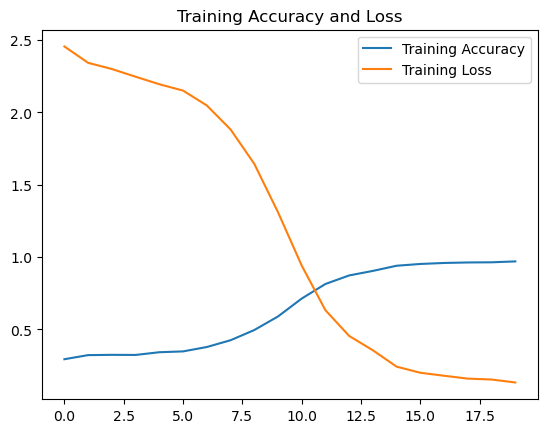

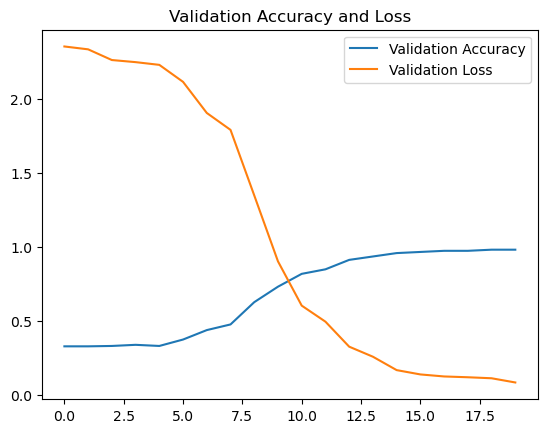

In [17]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.figure()
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, loss, label='Training Loss')
plt.legend()
plt.title('Training Accuracy and Loss')

plt.figure()
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.title('Validation Accuracy and Loss')

plt.show()

In [39]:
import numpy as np
import cv2
import requests
from io import BytesIO
import tensorflow as tf

class_names = [
    'Acne and Rosacea Photos',
    'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions',
    'Atopic Dermatitis Photos',
    'Cellulitis Impetigo and other Bacterial Infections',
    'Eczema Photos',
    'Exanthems and Drug Eruptions',
    'Herpes HPV and other STDs Photos',
    'Light Diseases and Disorders of Pigmentation',
    'Lupus and other Connective Tissue diseases',
    'Melanoma Skin Cancer Nevi and Moles',
    'Poison Ivy Photos and other Contact Dermatitis',
    'Psoriasis pictures Lichen Planus and related diseases',
    'Seborrheic Keratoses and other Benign Tumors',
    'Systemic Disease',
    'Tinea Ringworm Candidiasis and other Fungal Infections',
    'Urticaria Hives',
    'Vascular Tumors',
    'Vasculitis Photos',
    'Warts Molluscum and other Viral Infections'
]

cnn_model = tf.keras.models.load_model('new_model.h5')

def predict_skin_disease(image_url):
    img_size = (192, 192, 3) 

    response = requests.get(image_url)
    img_array = np.array(bytearray(response.content), dtype=np.uint8)

    image = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
    
    if image is None:
        print("Failed to load image.")
        return None

    image = cv2.resize(image, img_size[0:2])
    image = image[:, :, ::-1]

    image = image / 255.0  
    image = np.expand_dims(image, axis=0)  

    prediction = cnn_model.predict(image, verbose=0)[0]
    predicted_class_index = np.argmax(prediction)
    
    if predicted_class_index >= len(class_names):
        print(f"Prediction index out of range: {predicted_class_index}")
        return None
    
    predicted_class_label = class_names[predicted_class_index]

    return predicted_class_label

In [40]:
image_url = 'https://www.askdrsears.com/wp-content/uploads/2013/08/ringworm-symptoms.jpg'
predicted_label = predict_skin_disease(image_url)
print(f"Predicted skin disease: {predicted_label}")

Predicted skin disease: Seborrheic Keratoses and other Benign Tumors
